In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

2.3760009886661493 -50.04860819123999
-40.62170704944848 -150.0687339103713
17.938601042408536 83.02059051747443
48.96500033864197 -176.42413340745293
-88.56515136020208 -109.5516316613148
44.35997462435827 -43.16134112268492
-1.340603661590194 97.99574507140102
30.35619728415442 -9.340789282632898
47.35399912164641 -163.11387021227046
-49.41008014000818 158.41929354305404
-43.480979684428554 -69.87138870131535
84.20094700655392 -154.52665061614607
31.604873221890685 -32.396587433112586
-64.78823979196761 -49.09294259143249
-33.61981320400931 2.2506160262900607
-57.054247669994204 136.94446970129883
44.189779230449034 -23.80272018153957
-4.623610163817688 90.06590040506768
54.38593508225077 5.679871818994883
43.96856927128974 11.083037672415173
58.409256692741906 44.80720484397963
29.69233255202525 -37.16656042586476
-55.171686634352625 161.53233162120256
-22.744378057746232 -43.25462605229811
-59.43799723058117 -89.44289448119845
-6.344651534521134 16.54063670783603
83.9702332497815 -

34.035963823141586 159.21711805654343
42.99586576886492 -120.00699237571338
69.54888329965112 60.316399839157924
-60.75539538638157 124.81860640434536
43.60059619820913 -69.87698912249944
-80.74141492686856 -105.26216339483797
20.50537981783448 147.36301100376016
7.133036142255932 89.85577979625043
-6.531162140569478 85.95610035371118
56.921975850742996 -120.38960528279125
-69.74573476730743 175.67198385584436
9.199894804088274 90.63419631762241
-49.85159744941371 120.40589086386308
-88.2527300211618 -25.328720205392784
22.71088933540628 -95.41237751431741
-38.53423683631586 173.35440621116044
41.69109611757074 -73.02570415150788
-55.70901872954683 94.24088217399441
-85.85859088806025 75.81586509267473
26.19851517544849 -102.94730804693712
28.50326600834856 -51.66717186565782
32.735158184344954 86.1690455110188
49.00753271328213 70.24436359675946
-66.40446806226296 -119.24708603348745
-27.614055446994847 52.80716125572505
44.694030635593094 -40.850027846601535
-54.93514301731259 -151.2

In [5]:
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amapa
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | anakapalle
Processing Record 4 of Set 1 | provideniya
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | torbay
Processing Record 7 of Set 1 | padang
Processing Record 8 of Set 1 | agadir
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | tuatapere
Processing Record 11 of Set 1 | san carlos de bariloche
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | praia da vitoria
Processing Record 18 of Set 1 | meulaboh
Processing Record 19 of Set 1 | leeuwarden
Processing Record 20 of Set 1 | vaiano
Processing Record 21 of Set 1 | manturovo
Processing Record 22 of Set 1 | duque de caxias
Processing R

Processing Record 36 of Set 4 | deputatskiy
Processing Record 37 of Set 4 | faanui
Processing Record 38 of Set 4 | kavaratti
Processing Record 39 of Set 4 | moerai
Processing Record 40 of Set 4 | los llanos de aridane
Processing Record 41 of Set 4 | denpasar
Processing Record 42 of Set 4 | mount isa
Processing Record 43 of Set 4 | patrocinio
Processing Record 44 of Set 4 | sorong
Processing Record 45 of Set 4 | sebinkarahisar
Processing Record 46 of Set 4 | tadine
Processing Record 47 of Set 4 | mahebourg
Processing Record 48 of Set 4 | constitucion
Processing Record 49 of Set 4 | east london
Processing Record 50 of Set 4 | cortez
Processing Record 1 of Set 5 | kalamare
Processing Record 2 of Set 5 | saint-michel-des-saints
Processing Record 3 of Set 5 | havre-saint-pierre
Processing Record 4 of Set 5 | valpacos
Processing Record 5 of Set 5 | mount gambier
Processing Record 6 of Set 5 | cabo san lucas
Processing Record 7 of Set 5 | avarua
Processing Record 8 of Set 5 | georgetown
Proce

Processing Record 24 of Set 8 | bathsheba
Processing Record 25 of Set 8 | shahreza
Processing Record 26 of Set 8 | chisec
Processing Record 27 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 28 of Set 8 | rio gallegos
Processing Record 29 of Set 8 | kahta
Processing Record 30 of Set 8 | biu
Processing Record 31 of Set 8 | tarauaca
Processing Record 32 of Set 8 | kuzovatovo
Processing Record 33 of Set 8 | guangyuan
Processing Record 34 of Set 8 | polson
Processing Record 35 of Set 8 | castro
Processing Record 36 of Set 8 | cracaoani
City not found. Skipping...
Processing Record 37 of Set 8 | buraydah
Processing Record 38 of Set 8 | cam ranh
Processing Record 39 of Set 8 | kirakira
Processing Record 40 of Set 8 | tsentralnyy
City not found. Skipping...
Processing Record 41 of Set 8 | ilave
Processing Record 42 of Set 8 | hanumangarh
Processing Record 43 of Set 8 | nyagan
Processing Record 44 of Set 8 | igarka
Processing Record 45 of Set 8 | dauphin
Processing Record 4

Processing Record 14 of Set 12 | winnemucca
Processing Record 15 of Set 12 | eastbourne
Processing Record 16 of Set 12 | sao jose da coroa grande
Processing Record 17 of Set 12 | barahona
Processing Record 18 of Set 12 | nalut
Processing Record 19 of Set 12 | port macquarie
Processing Record 20 of Set 12 | ajdabiya
Processing Record 21 of Set 12 | gushikawa
Processing Record 22 of Set 12 | kahului
Processing Record 23 of Set 12 | eluru
Processing Record 24 of Set 12 | vakhrushev
Processing Record 25 of Set 12 | amalapuram
Processing Record 26 of Set 12 | bo
City not found. Skipping...
Processing Record 27 of Set 12 | sawakin
Processing Record 28 of Set 12 | hohhot
Processing Record 29 of Set 12 | necochea
Processing Record 30 of Set 12 | hershey
Processing Record 31 of Set 12 | gold coast
Processing Record 32 of Set 12 | idritsa
Processing Record 33 of Set 12 | kysyl-syr
Processing Record 34 of Set 12 | samarai
Processing Record 35 of Set 12 | chicama
Processing Record 36 of Set 12 | s

In [14]:
len(city_data)

563

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Amapa,1.0000,-52.0000,77.50,96,90,3.40,BR,2022-07-18 18:36:39
1,Mataura,-46.1927,168.8643,43.48,97,100,0.83,NZ,2022-07-18 18:36:40
2,Anakapalle,17.6833,83.0167,80.55,86,96,8.25,IN,2022-07-18 18:36:40
3,Provideniya,64.3833,-173.3000,42.57,64,100,23.89,RU,2022-07-18 18:36:41
4,Punta Arenas,-53.1500,-70.9167,41.11,75,40,31.07,CL,2022-07-18 18:35:08
5,Torbay,47.6666,-52.7314,79.57,49,40,18.41,CA,2022-07-18 18:36:41
6,Padang,-0.9492,100.3543,76.82,80,22,4.05,ID,2022-07-18 18:36:42
7,Agadir,30.4202,-9.5982,86.45,61,54,4.88,MA,2022-07-18 18:36:42
8,Bethel,41.3712,-73.4140,77.09,91,100,8.05,US,2022-07-18 18:36:43
9,Tuatapere,-46.1333,167.6833,45.45,87,100,1.41,NZ,2022-07-18 18:36:43


In [23]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]

city_data_df


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Amapa,BR,2022-07-18 18:36:39,1.0000,-52.0000,77.50,96,90,3.40
1,Mataura,NZ,2022-07-18 18:36:40,-46.1927,168.8643,43.48,97,100,0.83
2,Anakapalle,IN,2022-07-18 18:36:40,17.6833,83.0167,80.55,86,96,8.25
3,Provideniya,RU,2022-07-18 18:36:41,64.3833,-173.3000,42.57,64,100,23.89
4,Punta Arenas,CL,2022-07-18 18:35:08,-53.1500,-70.9167,41.11,75,40,31.07
...,...,...,...,...,...,...,...,...,...
558,Lincoln,US,2022-07-18 18:50:39,40.8000,-96.6670,90.86,57,0,10.36
559,Phan Thiet,VN,2022-07-18 18:51:54,10.9333,108.1000,79.27,84,100,6.69
560,Tungor,RU,2022-07-18 18:52:36,53.3808,142.9564,53.22,97,99,15.14
561,Monticello,US,2022-07-18 18:48:34,45.3055,-93.7941,94.91,49,0,12.66


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

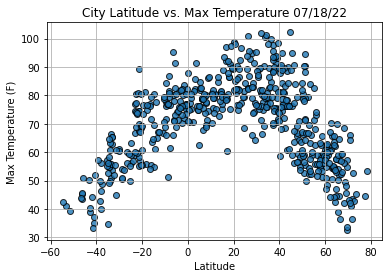

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

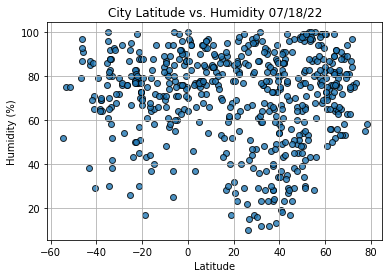

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

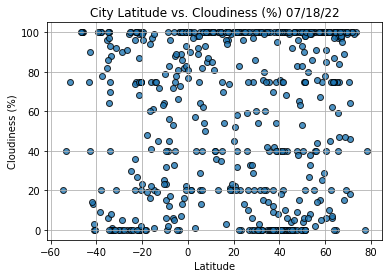

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

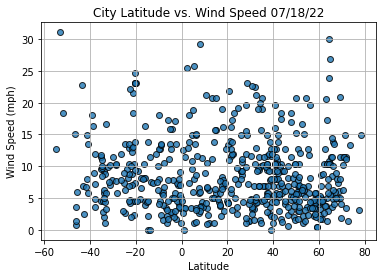

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()